# stdpopsim example notebook

#### This notebook serves as a place to play with `stdpopsim` in a ready to go environment.

If you did not open this notebook via Binder, try clicking [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/popsim-consortium/stdpopsim/main?filepath=stdpopsim_example.ipynb)

__Instructions on using a Jupyter Notebook__ - Simply click the cell and press shift-enter, or click the "Run" button in the top panel.  
*Note: If the notebook seems slow to run, try restarting the kernel.*
*If you want to save your work while using Binder, making sure to save and download your notebook*

To run `stdpopsim` locally, make sure to follow the [installation instructions](https://stdpopsim.readthedocs.io/en/latest/installation.html)

--------------------------

## API example

#### To get started, let's run a simple simulation and compute the site frequency spectrum.

Import the necessary packages

In [1]:
import stdpopsim
import matplotlib.pyplot as plt
import numpy as np

C:\Users\PHLUP\miniconda3\envs\masterarbeit\Lib\site-packages\stdpopsim\catalog\HomSap\demographic_models.py:158: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.head(1) - 1), rate=0
C:\Users\PHLUP\miniconda3\envs\masterarbeit\Lib\site-packages\stdpopsim\catalog\HomSap\demographic_models.py:161: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.tail(1) + 1), rate=0


Simulate 10% of human chromosome 22 with the [three population out-of-Africa model](https://stdpopsim.readthedocs.io/en/latest/catalog.html#sec_catalog_homsap_models_outofafrica_3g09), with 10 samples from each of the three populations.

In [2]:
species = stdpopsim.get_species("HomSap")
contig = species.get_contig("chr22", length_multiplier=0.1)
model = species.get_demographic_model("OutOfAfrica_3G09")
samples = model.get_samples(10, 10, 10)
engine = stdpopsim.get_default_engine()
ts = engine.simulate(model, contig, samples)
print("simulated {} trees and {} sites, from {} samples.".format(ts.num_trees, ts.num_sites, ts.num_samples))

C:\Users\PHLUP\miniconda3\envs\masterarbeit\Lib\site-packages\stdpopsim\models.py:248: DeprecatedFeatureWarning: The use of `DemographicModel.get_samples` (Python API) and positional sample counts (CLI) is deprecated. Instead, supply a {population_name:num_samples} dict to `Engine.simulate(samples=...)` (Python API); or use the syntax `stdpopsim SpeciesName population_name:num_samples` (CLI).
  warnings.warn(
C:\Users\PHLUP\miniconda3\envs\masterarbeit\Lib\site-packages\stdpopsim\engines.py:120: UserWarning: The demographic model has mutation rate 2.35e-08, but this simulation used the contig's mutation rate 1.29e-08. Diversity levels may be different than expected for this species. For details see documentation at https://popsim-consortium.github.io/stdpopsim-docs/stable/tutorial.html
  warnings.warn(


simulated 13016 trees and 9409 sites, from 30 samples.


In [18]:
contig

Contig(recombination_map=RateMap(position=array([      0., 5081847.]), rate=array([2.10572339e-08])), mutation_rate=1.29e-08, ploidy=2, bacterial_recombination=False, gene_conversion_fraction=None, gene_conversion_length=None, genetic_map=None, inclusion_mask=None, exclusion_mask=None, dfe_list=[DFE(id='neutral', description='neutral DFE', long_description='strictly neutral mutations', mutation_types=[MutationType(dominance_coeff=0.5, distribution_type='f', distribution_args=[0], convert_to_substitution=True)], proportions=[1.0], citations=[], qc_dfe=None)], interval_list=[array([[      0, 5081847]])], original_coordinates=('chr22', 0, 5081847))

Next, we get subsets of the data corresponding to each set of samples and then we simplfy to get the tree sequences corresponding to these subsets of samples. This removes monomorphic sites within each population.

In [8]:
print(ts.dump_tables())

TableCollection

Sequence Length: 5081847.0
Time units: generations
Metadata: b''

Individuals
╔══╤═════╤════════╤═══════╤════════╗
║id│flags│location│parents│metadata║
╠══╪═════╪════════╪═══════╪════════╣
║0 │    0│        │       │        ║
║1 │    0│        │       │        ║
║2 │    0│        │       │        ║
║3 │    0│        │       │        ║
║4 │    0│        │       │        ║
║5 │    0│        │       │        ║
║6 │    0│        │       │        ║
║7 │    0│        │       │        ║
║8 │    0│        │       │        ║
║9 │    0│        │       │        ║
║10│    0│        │       │        ║
║11│    0│        │       │        ║
║12│    0│        │       │        ║
║13│    0│        │       │        ║
║14│    0│        │       │        ║
║15│    0│        │       │        ║
║16│    0│        │       │        ║
║17│    0│        │       │        ║
║18│    0│        │       │        ║
║19│    0│        │       │        ║
║20│    0│        │       │        ║
║21│    0│       

In [10]:
ts_YRI

In [3]:
YRI_samples = ts.samples(0)
CEU_samples = ts.samples(1)
CHB_samples = ts.samples(2)
ts_YRI = ts.simplify(samples=YRI_samples)
ts_CEU = ts.simplify(samples=CEU_samples)
ts_CHB = ts.simplify(samples=CHB_samples)

Next, we calculate the site frequency spectrum for each population.

In [4]:
sfs_YRI = ts_YRI.allele_frequency_spectrum(polarised=True,span_normalise=False)
sfs_CEU = ts_CEU.allele_frequency_spectrum(polarised=True,span_normalise=False)
sfs_CHB = ts_CHB.allele_frequency_spectrum(polarised=True,span_normalise=False)

In [5]:
sfs_CHB

array([   0., 1112.,  576.,  523.,  386.,  352.,  259.,  263.,  245.,
        259.,    0.])

Finally, we plot the site frequency spectrum for each population.

[]

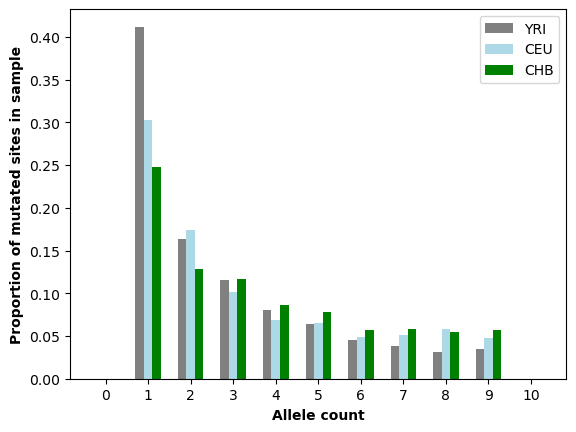

In [9]:
bar_width = 0.2
r1 = np.arange(0,11) - 0.2
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
ax = plt.subplot()
plt.bar(x = r1, height = sfs_YRI/ts_YRI.num_sites, width=bar_width, color='grey')
plt.bar(x = r2, height = sfs_CEU/ts_CEU.num_sites, width=bar_width, color='lightblue')
plt.bar(x = r3, height = sfs_CHB/ts_CHB.num_sites, width=bar_width, color='green')
plt.xlabel("Allele count", fontweight="bold")
plt.ylabel("Proportion of mutated sites in sample", fontweight="bold")
ax.set_xticks(np.arange(0,11))
ax.legend(['YRI', 'CEU', 'CHB'])
plt.plot()

## CLI Example

#### Let's run the same simulation model as above, but with the CLI.

Simulate 10% of human chromosome 22 with the [three population out-of-Africa model](https://stdpopsim.readthedocs.io/en/latest/catalog.html#sec_catalog_homsap_models_outofafrica_3g09), with 10 samples from each of the three populations.

In [ ]:
%%bash
stdpopsim HomSap --chromosome chr22 --length-multiplier 0.1 --demographic-model OutOfAfrica_3G09 --output OutOfAfrica_3G09.trees 10 10 10

Now, we can use tskit to read the simulated file and calculate the site frequency spectrum.

In [ ]:
import tskit
ts = tskit.load("OutOfAfrica_3G09.trees")

Once we have loaded the simulated tree sequence file, we can use the same code as above.

In [ ]:
YRI_samples = ts.samples(0)
CEU_samples = ts.samples(1)
CHB_samples = ts.samples(2)
ts_YRI = ts.simplify(samples=YRI_samples)
ts_CEU = ts.simplify(samples=CEU_samples)
ts_CHB = ts.simplify(samples=CHB_samples)

sfs_YRI = ts_YRI.allele_frequency_spectrum(polarised=True,span_normalise=False)
sfs_CEU = ts_CEU.allele_frequency_spectrum(polarised=True,span_normalise=False)
sfs_CHB = ts_CHB.allele_frequency_spectrum(polarised=True,span_normalise=False)

In [ ]:
bar_width = 0.2
r1 = np.arange(0,11) - 0.2
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
ax = plt.subplot()
plt.bar(x = r1, height = sfs_YRI/ts_YRI.num_sites, width=bar_width, color='grey')
plt.bar(x = r2, height = sfs_CEU/ts_CEU.num_sites, width=bar_width, color='lightblue')
plt.bar(x = r3, height = sfs_CHB/ts_CHB.num_sites, width=bar_width, color='green')
plt.xlabel("Allele count", fontweight="bold")
plt.ylabel("Proportion of mutated sites in sample", fontweight="bold")
ax.set_xticks(np.arange(0,11))
ax.legend(['YRI', 'CEU', 'CHB'])
plt.plot()

-------------------------------
## Try out the [tutorials](https://stdpopsim.readthedocs.io/en/latest/tutorial.html#) yourself

*Remember, if you want to play with the CLI, use the Jupyter Notebook bash magic at the beginning of the cell `%%bash`*